## RHI
* Author: Syed Hamid
* Date: Feb 16, 2023

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pyart
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import wradlib as wrl
import glob
import xarray as xr


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
files = glob.glob("../MDV*nc")
print(files[0])

../MDV-20180609-121830-RHIVol.nc


In [3]:
radar = pyart.io.read_cfradial(files[0])

In [4]:
radar.azimuth['data'].min(), radar.azimuth['data'].max()

(214.57123, 239.00208)

In [5]:
import numpy as np
for number in np.unique(radar.elevation['data']):
    print(f"{number:.2f}", end=', ')

0.00, 0.01, 0.04, 0.13, 0.26, 0.43, 0.63, 0.84, 1.05, 1.26, 1.47, 1.68, 1.89, 2.10, 2.31, 2.52, 2.73, 2.94, 3.15, 3.36, 3.57, 3.78, 3.99, 4.20, 4.41, 4.62, 4.83, 5.04, 5.25, 5.46, 5.67, 5.88, 6.09, 6.30, 6.51, 6.72, 6.93, 7.14, 7.35, 7.56, 7.77, 7.98, 8.19, 8.40, 8.61, 8.82, 9.03, 9.24, 9.45, 9.66, 9.87, 10.08, 10.29, 10.50, 10.71, 10.92, 11.13, 11.34, 11.55, 11.76, 11.97, 12.18, 12.39, 12.60, 12.81, 13.02, 13.23, 13.44, 13.65, 13.86, 14.07, 14.28, 14.49, 14.70, 14.91, 15.12, 15.33, 15.54, 15.75, 15.96, 16.17, 16.38, 16.59, 16.80, 17.01, 17.22, 17.43, 17.64, 17.85, 18.06, 18.27, 18.48, 18.69, 18.90, 19.11, 19.32, 19.53, 19.74, 19.95, 20.16, 20.37, 20.58, 20.79, 21.00, 21.21, 21.42, 21.63, 21.84, 22.05, 22.26, 22.47, 22.68, 22.89, 23.10, 23.31, 23.52, 23.73, 23.94, 24.15, 24.36, 24.57, 24.78, 24.99, 25.20, 25.41, 25.62, 25.83, 26.04, 26.25, 26.46, 26.67, 26.88, 27.09, 27.30, 27.51, 27.72, 27.93, 28.14, 28.35, 28.56, 28.77, 28.98, 29.19, 29.40, 29.61, 29.82, 30.03, 30.24, 30.45, 30.66, 3

In [6]:
radar.nsweeps, radar.fixed_angle['data']

(1,
 masked_array(data=[239.00208],
              mask=False,
        fill_value=1e+20,
             dtype=float32))

In [7]:
display = pyart.graph.RadarMapDisplay(radar)

In [8]:
radar.fields.keys()

dict_keys(['UH', 'UV', 'DBZH', 'DBZV', 'ZDR', 'RHOHV', 'PHIDP', 'NCPH', 'NCPV', 'SNRHC', 'SNRVC', 'VELH', 'VELV', 'WIDTHH', 'WIDTHV', 'CCORH', 'CCORV'])

<Figure size 640x480 with 0 Axes>

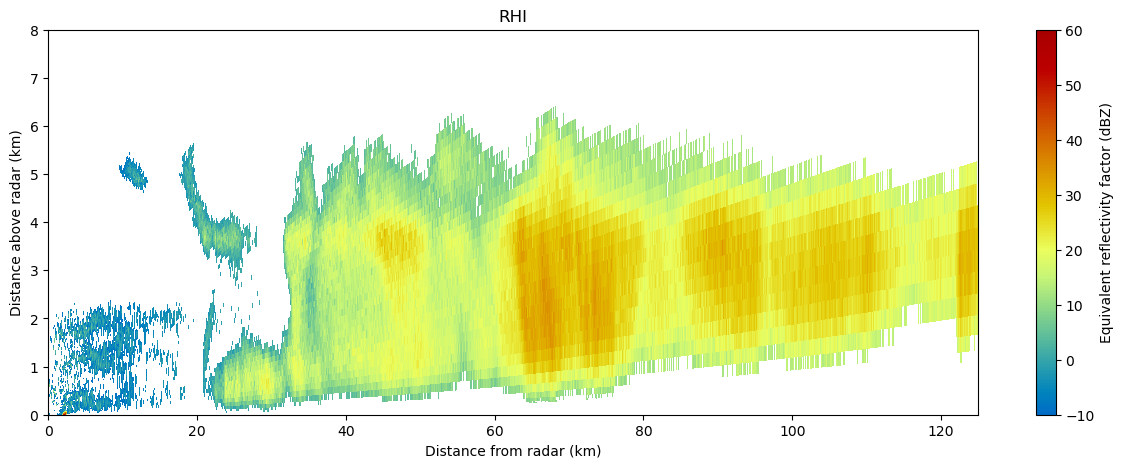

In [9]:
fig = plt.figure() 
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=[15, 5])
fig.subplots_adjust(hspace=0.4)
xlabel = "Distance from radar (km)"
ylabel = "Distance above radar (km)"
colorbar_label = "Equivalent reflectivity factor (dBZ)"
# nplots = radar.nsweeps

fixed_angle = radar.fixed_angle["data"][0]
title = "RHI Az=%.3f" % (fixed_angle)
ax = fig.add_subplot(1, 1, 1)
display.plot_rhi("DBZH",
    0,
    vmin=-10,
    vmax=60,
    mask_outside=True,
    title="RHI",
    axislabels=(xlabel, ylabel),
    cmap="pyart_HomeyerRainbow",
    colorbar_label=colorbar_label,
    ax=ax,
)
display.set_limits(ylim=[0, 8], ax=ax)

**Note:** RHI can be plotted using PyART, as demonstrated above. Now, converting it to a grid makes no sense because RHI data has only one fixed angle and there is no need to convert it to grid. However, if you want to plot it with geographic coordinates, you can use PyART to create a grid, as shown below.

In [10]:
grid = pyart.map.grid_from_radars(radar,(100, 500, 500),
                   ((0.,15000.),(-120000.,120000.),(-120000.,120000.)),
                                  weighting_function='Barnes2')
grid

In [11]:
xg = grid.to_xarray().swap_dims({'y':'lat', 'x':'lon'})

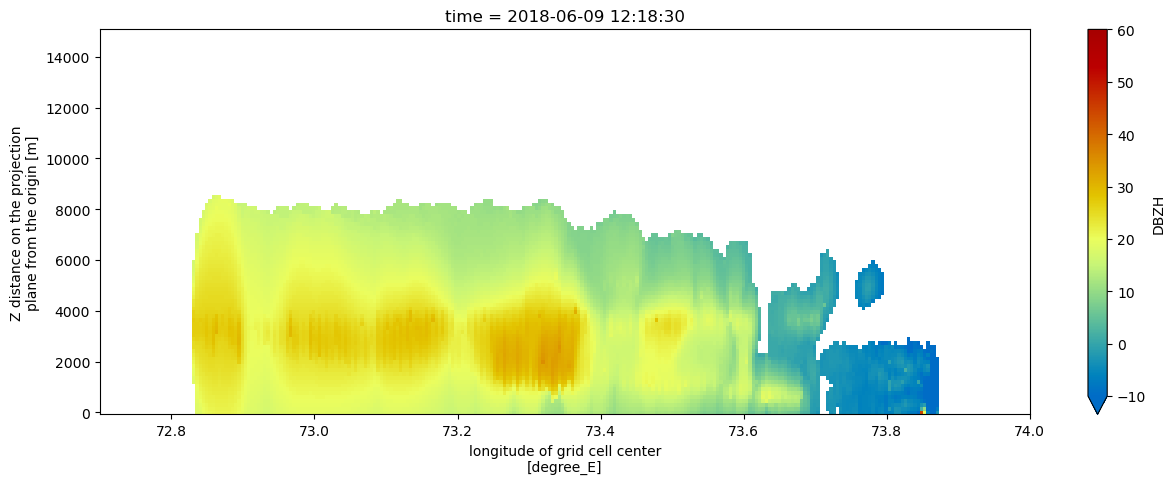

In [12]:
xg.DBZH[0].max('lat').plot(figsize=[15, 5], vmin=-10,
    vmax=60,
    cmap="pyart_HomeyerRainbow", xlim=(72.7, 74))

Since there is only one fixed angle, 239 deg (southwest), it should appear as shown above if we use geographic coordinates.

In [13]:
## Using wradlib

In [14]:
vol = wrl.io.open_cfradial1_dataset(files[0])

In [15]:
rhi = vol[0].pipe(wrl.georef.georeference_dataset)

(0.0, 9000.0)

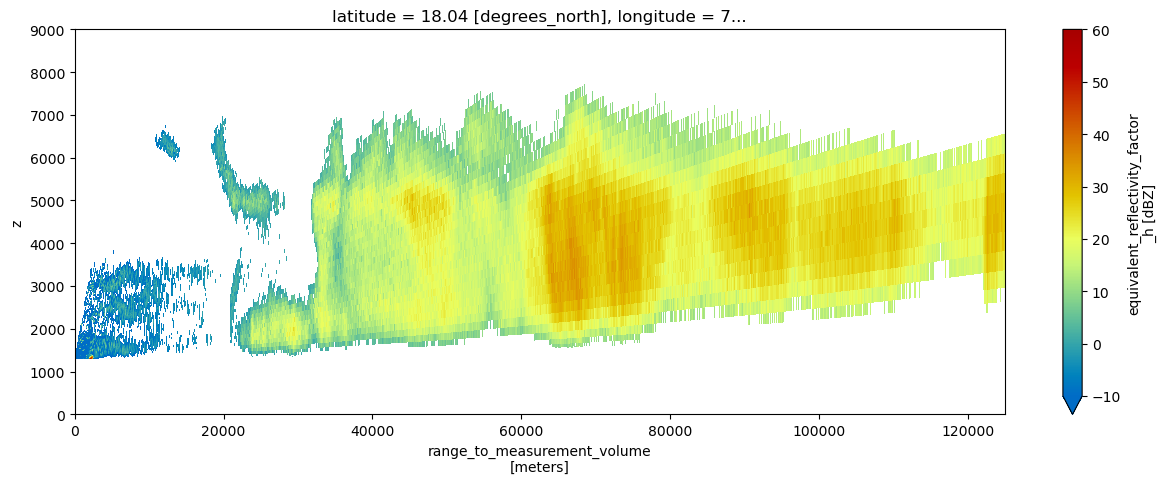

In [17]:
plt.figure(figsize=[15, 5])
ax = plt.axes()
rhi.DBZH.sortby('elevation').plot(y='z',
                                  vmin=-10, vmax=60, cmap="pyart_HomeyerRainbow",ax=ax)
ax.set_ylim(0, 9e3)